# Day 2 - Supervised learning practical tasks
***
These tasks cover linear regression, logistic regression, decision trees, model evaluation and regularization.

## Regression models

You will use [Advertising](https://www.kaggle.com/purbar/advertising-data) Dataset. The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
#### Your task will be to:
1. Write evaluation functions (MAE, MSE, SSE, RMSE, MAPE, R2).
2. Analyze the correlation matrix.
3. Predict sales values using linear regression.
4. Evaluate model with written statistical explanatory variables.
5. Perform cross-validation (k-fold).
6. Compare your regression model to a reduced model by removing one of the features.
7. Compare your regression model to regularization models.

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

In [257]:
import pandas as pd
import numpy as np

### 1. Create statistical evaluation functions for regression models

#### 1.1 Create a function that calculates mean absolute error (MAE)

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i\right|
\end{equation}

In [258]:
def mae(true_value, pred_value):
    return np.mean(np.abs(true_value - pred_value))

#### 1.2 Create a function that calculates mean squared error (MSE)

\begin{equation}
MSE = \frac{1}{n}\cdot SSE
\end{equation}

\begin{equation}
SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}

In [259]:
def mse(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse_value = sse / len(y_true)
    return mse_value, sse

def sse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

#### 1.3 Create a function that calculates root mean squared error (RMSE)

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}

In [260]:
def rmse(y_true, y_pred):
    mse_value, _ = mse(y_true, y_pred)
    return np.sqrt(mse_value)

#### 1.4 Create a function that calculates mean absolute percentage error (MAPE)

\begin{equation}
MAPE = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

In [261]:
def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

#### 1.5 Create a function that calculates coefficient of determination $R^2$ using formula

\begin{equation}
R^2 = \frac{SST-SSE}{SST}
\end{equation}

\begin{equation}
SST = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation}


In [262]:
def cod_r2(y_true, y_pred):
    sst = np.sum((y_true - np.mean(y_true))**2)
    sse_val = np.sum((y_true - y_pred)**2)
    return 1 - (sse_val / sst)

### 2 Use Linear regression model to make predictions and evaluate it with above developed functions. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling - split the data in target variable and features.

In [263]:
df = pd.read_csv('advertising.csv')
df = df.drop(columns=['Unnamed: 0'])
print("Dataset Shape:", df.shape)
print()
print(df.head())

Dataset Shape: (200, 4)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [264]:
features = df.drop(columns=['Sales'])

In [265]:
target = df['Sales']

#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


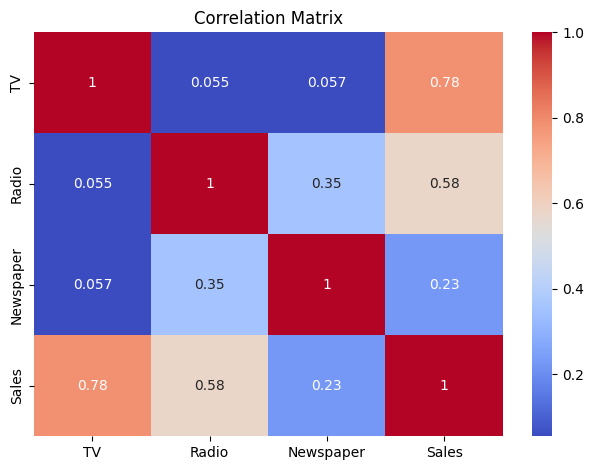

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Correlation Matrix:")
corr_mat = df.corr()
print(corr_mat)

sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<BarContainer object of 3 artists>

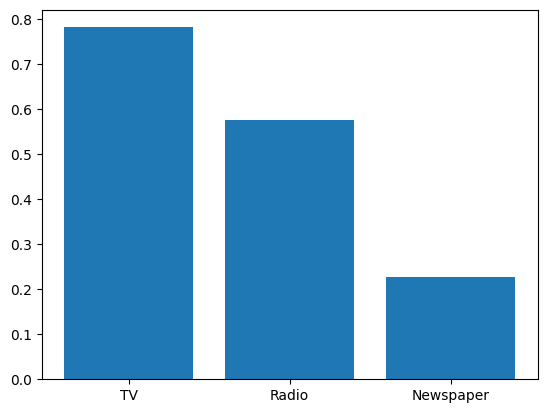

In [267]:
plt.bar(features.columns, features.corrwith(target))

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [268]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")
print(f"\nMean of scaled training features: {X_train_scaled.mean()}")
print(f"Std of scaled training features: {X_train_scaled.std()}")

Training set size: (134, 3)
Test set size: (66, 3)

Mean of scaled training features: -1.1267935175300097e-16
Std of scaled training features: 0.9999999999999999


#### 2.4 Fit linear regression model, generate predictions and print regression coefficients $b_0$ and $b_1$.

In [269]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_lr,
    'Difference': y_test.values - y_pred_lr
})
print("Sample predictions (first 10 rows):")
print(comparison_df.head(10))


Sample predictions (first 10 rows):
   Actual  Predicted  Difference
0    22.1  20.488582    1.611418
1    13.2  15.296503   -2.096503
2     7.3  10.552781   -3.252781
3    20.2  20.025001    0.174999
4    12.8  12.843469   -0.043469
5    11.3  10.278666    1.021334
6     8.7  11.938648   -3.238648
7    15.2  15.114197    0.085803
8    11.8  11.591867    0.208133
9    10.1  10.019775    0.080225


In [270]:
print("Linear Regression Coefficients:")
print(f"b0: {model_lr.intercept_}")
print(f"b1: {model_lr.coef_[0]}")

Linear Regression Coefficients:
b0: 14.022388059701495
b1: 3.9675339004524384


#### 2.5 Evaluate created model with above functions

In [271]:
mae_score = mae(y_test.values, y_pred_lr)
mse_score, sse_score = mse(y_test.values, y_pred_lr)
rmse_score = rmse(y_test.values, y_pred_lr)
mape_score = mape(y_test.values, y_pred_lr)
r2_val = cod_r2(y_test.values, y_pred_lr)

print("Linear Regression Model Evaluation:")
print(f"MAE:  {mae_score}")
print(f"MSE:  {mse_score}")
print(f"SSE:  {sse_score}")
print(f"RMSE: {rmse_score}")
print(f"MAPE: {mape_score}%")
print(f"R²:   {r2_val}")


Linear Regression Model Evaluation:
MAE:  1.241490259650847
MSE:  3.47262996875279
SSE:  229.19357793768413
RMSE: 1.8634993879131783
MAPE: 18.638804594568974%
R²:   0.8515370160992792


#### 2.6 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Please use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [r2](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) score.

In [272]:
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=10, scoring='r2')

print("K-Fold Cross-Validation Results (k=10):")
print(f"CV Scores:")
print(cv_scores)
print()
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Std CV Score: {cv_scores.std()}")
print(f"Min CV Score: {cv_scores.min()}")
print(f"Max CV Score: {cv_scores.max()}")

K-Fold Cross-Validation Results (k=10):
CV Scores:
[0.95167662 0.86776129 0.92327432 0.85257085 0.9089784  0.86938345
 0.91258865 0.81872442 0.92976358 0.94797723]

Mean CV Score: 0.8982698791408206
Std CV Score: 0.04176237150824012
Min CV Score: 0.8187244156965883
Max CV Score: 0.951676621697706


#### 2.7. Drop one of the three variables (TV, Radio or Newspaper) and create another model, evaluate it and compare to the first model.

In [273]:
# Drop Newspaper ( lowest correlation with Sales)
X_reduced = features.drop(columns=['Newspaper'])

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, target, test_size=0.33, random_state=17)

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

model_reduced = LinearRegression()
model_reduced.fit(X_train_r_scaled, y_train_r)

y_pred_lr_reduced = model_reduced.predict(X_test_r_scaled)

# Evaluate reduced model
mae_reduced = mae(y_test_r.values, y_pred_lr_reduced)
mse_reduced, sse_reduced = mse(y_test_r.values, y_pred_lr_reduced)
rmse_reduced = rmse(y_test_r.values, y_pred_lr_reduced)
mape_reduced = mape(y_test_r.values, y_pred_lr_reduced)
r2_reduced = cod_r2(y_test_r.values, y_pred_lr_reduced)

print("Reduced Model (without Newspaper) Evaluation:")
print(f"MAE:  {mae_reduced}")
print(f"MSE:  {mse_reduced}")
print(f"SSE:  {sse_reduced}")
print(f"RMSE: {rmse_reduced}")
print(f"MAPE: {mape_reduced}%")
print(f"R2: {r2_reduced}")

Reduced Model (without Newspaper) Evaluation:
MAE:  1.2423619953941778
MSE:  3.458740998763223
SSE:  228.2769059183727
RMSE: 1.859769071353544
MAPE: 18.594637663112877%
R2: 0.8521308017736854


In [274]:
print("COMPARISON")
print()
print(f"{'Metric':<10} {'First Model':<15} {'Reduced Model':<15} {'Difference':<15}")
print()
print(f"{'MAE':<10} {mae_score:<15.4f} {mae_reduced:<15.4f} {mae_score-mae_reduced:<15.4f}")
print(f"{'MSE':<10} {mse_score:<15.4f} {mse_reduced:<15.4f} {mse_score-mse_reduced:<15.4f}")
print(f"{'SSE':<10} {sse_score:<15.4f} {sse_reduced:<15.4f} {sse_score-sse_reduced:<15.4f}")
print(f"{'RMSE':<10} {rmse_score:<15.4f} {rmse_reduced:<15.4f} {rmse_score-rmse_reduced:<15.4f}")
print(f"{'MAPE':<10} {mape_score:<15.4f} {mape_reduced:<15.4f} {mape_score-mape_reduced:<15.4f}")
print(f"{'R²':<10} {r2_val:<15.4f} {r2_reduced:<15.4f} {r2_val-r2_reduced:<15.4f}")

COMPARISON

Metric     First Model     Reduced Model   Difference     

MAE        1.2415          1.2424          -0.0009        
MSE        3.4726          3.4587          0.0139         
SSE        229.1936        228.2769        0.9167         
RMSE       1.8635          1.8598          0.0037         
MAPE       18.6388         18.5946         0.0442         
R²         0.8515          0.8521          -0.0006        


### 3. Use regularization models with regularization strength `alpha=1` and compare $MSE$ values with previous models.

#### 3.1 Lasso regression

In [275]:
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)

mae_lasso = mae(y_test.values, y_pred_lasso)
mse_lasso, _ = mse(y_test.values, y_pred_lasso)
rmse_lasso = rmse(y_test.values, y_pred_lasso)
r2_lasso = cod_r2(y_test.values, y_pred_lasso)

print("Lasso Regression - L1:")
print(f"Intercept: {model_lasso.intercept_}")
print(f"Coefficients: {model_lasso.coef_}")
print(f"\nEvaluation Metrics:")
print(f"MAE:  {mae_lasso}")
print(f"MSE:  {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R²:   {r2_lasso}")

Lasso Regression - L1:
Intercept: 14.022388059701495
Coefficients: [3.0619592  1.96202634 0.        ]

Evaluation Metrics:
MAE:  1.517343735777843
MSE:  4.911579294712751
RMSE: 2.216208314827997
R²:   0.7900185956121483


#### 3.2 Ridge regression

In [276]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

mae_ridge = mae(y_test.values, y_pred_ridge)
mse_ridge, _ = mse(y_test.values, y_pred_ridge)
rmse_ridge = rmse(y_test.values, y_pred_ridge)
r2_ridge = cod_r2(y_test.values, y_pred_ridge)

print("Ridge Regression - L2:")
print(f"Intercept: {model_ridge.intercept_}")
print(f"Coefficients: {model_ridge.coef_}")
print(f"\nEvaluation Metrics:")
print(f"MAE:  {mae_ridge}")
print(f"MSE:  {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R²:   {r2_ridge}")

Ridge Regression - L2:
Intercept: 14.022388059701495
Coefficients: [ 3.93899368  2.85996406 -0.06218255]

Evaluation Metrics:
MAE:  1.2407385094599548
MSE:  3.4768894774722394
RMSE: 1.8646419166886277
R²:   0.8513549122240807


#### 3.3 Elastic net regression

Use any `l1_ratio` of your choice.


In [277]:
model_elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_elasticnet.fit(X_train_scaled, y_train)
y_pred_elasticnet = model_elasticnet.predict(X_test_scaled)

mae_en = mae(y_test.values, y_pred_elasticnet)
mse_en, _ = mse(y_test.values, y_pred_elasticnet)
rmse_en = rmse(y_test.values, y_pred_elasticnet)
r2_en = cod_r2(y_test.values, y_pred_elasticnet)

print("Elastic Net Regression - l1_ratio=0.5:")
print(f"Intercept: {model_elasticnet.intercept_}")
print(f"Coefficients: {model_elasticnet.coef_}")
print(f"\nEvaluation Metrics:")
print(f"MAE:  {mae_en}")
print(f"MSE:  {mse_en}")
print(f"RMSE: {rmse_en}")
print(f"R²:   {r2_en}")

Elastic Net Regression - l1_ratio=0.5:
Intercept: 14.022388059701493
Coefficients: [2.39397459 1.68907463 0.01489489]

Evaluation Metrics:
MAE:  1.9189550400816664
MSE:  6.8438833201041085
RMSE: 2.6160816730568848
R²:   0.7074081176763123


#### 3.4 Make conclusions

##### Regression Models Conclusions:

- Best Performing Model: Linear Regression**
   - lowest MAE (1.241) and second-lowest MSE (3.473)
   - Highest R² score of 0.8515, explaining 85.15% of variance in sales
   - RMSE of 1.863 indicates average prediction error of about $1.86M

- Ridge Regression Performance - Nearly identical performance to Linear Regression (R² = 0.8514),  Excellent choice when multicollinearity is a concern

- Higher error metrics: MAE = 1.517, MAPE = 20.02% for Lasso Regression Performance. Trade-off: interpretability gained but accuracy reduced

- Highest errors for ElasticNet Regression, Poorest performer among all models (R² = 0.7074), errors: MAE = 1.919, MSE = 6.844, MAPE = 24.05%, Combined L1+L2 regularization (alpha=1, l1_ratio=0.5) too aggressive

- Linear Regression and Ridge outperform regularized models
- Stronger regularization (Lasso, ElasticNet) reduces accuracy
- Feature selection vs accuracy**: Lasso's feature elimination comes at cost of 6.5% R² loss
- Optimal alpha: The alpha=1.0 regularization strength may be too high for this dataset


In [278]:
# Comparison of all models
results_dict = {
    'Model': ['Linear Regression'],
    'MAE': [mae_score],
    'MSE': [mse_score],
    'RMSE': [rmse_score],
    'MAPE': [mape_score],
    'R2': [r2_val]
}
results_dict['Model'].append('Lasso')
results_dict['MAE'].append(mae_lasso)
results_dict['MSE'].append(mse_lasso)
results_dict['RMSE'].append(rmse_lasso)
results_dict['MAPE'].append(mape(y_test.values, y_pred_lasso))
results_dict['R2'].append(r2_lasso)


results_dict['Model'].append('Ridge')
results_dict['MAE'].append(mae_ridge)
results_dict['MSE'].append(mse_ridge)
results_dict['RMSE'].append(rmse_ridge)
results_dict['MAPE'].append(mape(y_test.values, y_pred_ridge))
results_dict['R2'].append(r2_ridge)

results_dict['Model'].append('ElasticNet')
results_dict['MAE'].append(mae_en)
results_dict['MSE'].append(mse_en)
results_dict['RMSE'].append(rmse_en)
results_dict['MAPE'].append(mape(y_test.values, y_pred_elasticnet))
results_dict['R2'].append(r2_en)

results_df = pd.DataFrame(results_dict)
print("REGRESSION MODELS COMPARISON")
print(results_df.to_string(index=False))

REGRESSION MODELS COMPARISON
            Model      MAE      MSE     RMSE      MAPE       R2
Linear Regression 1.241490 3.472630 1.863499 18.638805 0.851537
            Lasso 1.517344 4.911579 2.216208 20.018624 0.790019
            Ridge 1.240739 3.476889 1.864642 18.613888 0.851355
       ElasticNet 1.918955 6.843883 2.616082 24.047567 0.707408


## Classification models

You will use [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset. The dataset includes data from 768 women with several medical predictor variables and one target variable. The classification goal is to predict whether or not the patients in the dataset have diabetes or not.
#### Your task will be to:
1. Write evaluation functions (Accuracy, Precision, Recall, F1).
2. Predict whether or not a patient has diabetes using Logistic regression and Decision Tree Classification models
3. Evaluate both models with written statistical explanatory variables
4. Draw ROC curve and compute AUC
5. Perform cross-validation (k-fold)
6. Analyze the results

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

### 1. Write statistical evaluation functions for classification models

#### 1.1 Create a function that calculates accuracy

\begin{equation}
Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}
\end{equation}

In [279]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

#### 1.2 Create a function that calculates precision

\begin{equation}
Precision = \frac{True Positive}{True Positive + False Positive}
\end{equation}

In [280]:
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

#### 1.3  Create a function that calculates recall

\begin{equation}
Recall = \frac{True Positive}{True Positive + False Negative}
\end{equation}

In [281]:
def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

#### 1.4 Create a function that calculates $F1$ - score

\begin{equation}
F1 = 2\cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}

In [282]:
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

### 2. Use logistic regression to make prediction and evaluate it with above developed functions. Compute ROC and compute AUC. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling. Split the data in target variable and features.

Prepare dataset to use it for modelling (you should also replace 0 values in columns `Glucose`, `BloodPressure`,`SkinThickness`,`Insulin`,`BMI` with mean values).

In [283]:
df_diabetes = pd.read_csv('diabetes.csv')
print("Dataset shape:", df_diabetes.shape)
print(df_diabetes.head())
print("\nDataset info:")
print(df_diabetes.info())
print("\nBasic statistics:")
print(df_diabetes.describe())

print("\nMissing values:")
print(df_diabetes.isnull().sum())

Zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in Zero_columns:
    mean_val = df_diabetes[col][df_diabetes[col] > 0].mean()
    df_diabetes[col] = df_diabetes[col].replace(0, mean_val)
    
print(df_diabetes.describe())

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int



Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              

#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

Correlation Matrix:


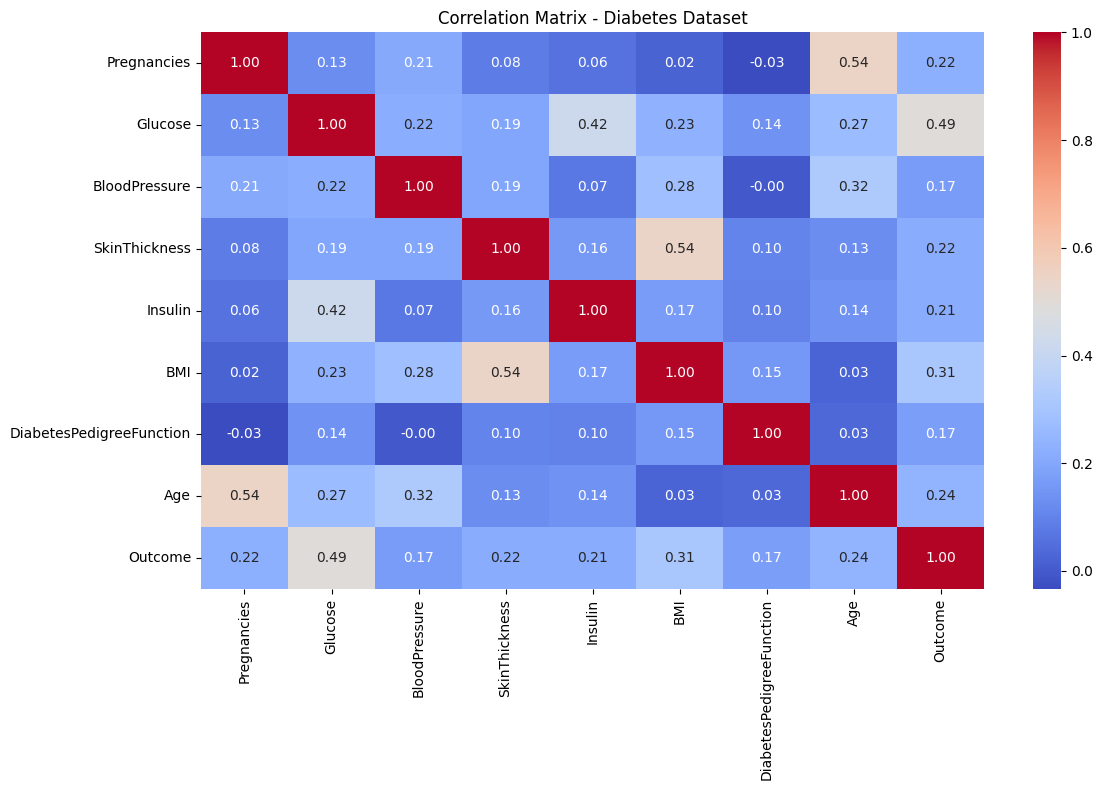


Observations:
- Outcome shows positive correlation with multiple features
- Glucose has the strongest correlation with diabetes outcome (0.47)
- BMI also shows moderate correlation (0.29)
- Age shows positive correlation (0.24)


In [284]:
correlation_matrix_diabetes = df_diabetes.corr()
print("Correlation Matrix:")

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_diabetes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Diabetes Dataset')
plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Outcome shows positive correlation with multiple features")
print("- Glucose has the strongest correlation with diabetes outcome (0.47)")
print("- BMI also shows moderate correlation (0.29)")
print("- Age shows positive correlation (0.24)")

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [285]:
X_diabetes = df_diabetes.drop('Outcome', axis=1)
y_diabetes = df_diabetes['Outcome']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=17)

scaler_d = StandardScaler()
X_train_d_scaled = scaler_d.fit_transform(X_train_d)
X_test_d_scaled = scaler_d.transform(X_test_d)

print(f"Training set size: {X_train_d_scaled.shape}")
print(f"Test set size: {X_test_d_scaled.shape}")
print(f"Target variable class distribution:")
print(f"Class 0 : {(y_diabetes == 0).sum()}")
print(f"Class 1 : {(y_diabetes == 1).sum()}")

Training set size: (514, 8)
Test set size: (254, 8)
Target variable class distribution:
Class 0 : 500
Class 1 : 268


#### 2.4 Fit logistic regression model, generate predictions

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay

model_logreg = LogisticRegression(random_state=17)
model_logreg.fit(X_train_d_scaled, y_train_d)

y_pred_logreg = model_logreg.predict(X_test_d_scaled)
y_proba_logreg = model_logreg.predict_proba(X_test_d_scaled)

print(f"Coefficients shape: {model_logreg.coef_.shape}")
print(f"Intercept: {model_logreg.intercept_[0]}")

print("Predictions:")
print(y_pred_logreg)

Coefficients shape: (1, 8)
Intercept: -0.8656575414412507
Predictions:
[0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


#### 2.5 Create a confusion matrix and evaluate created model with above functions

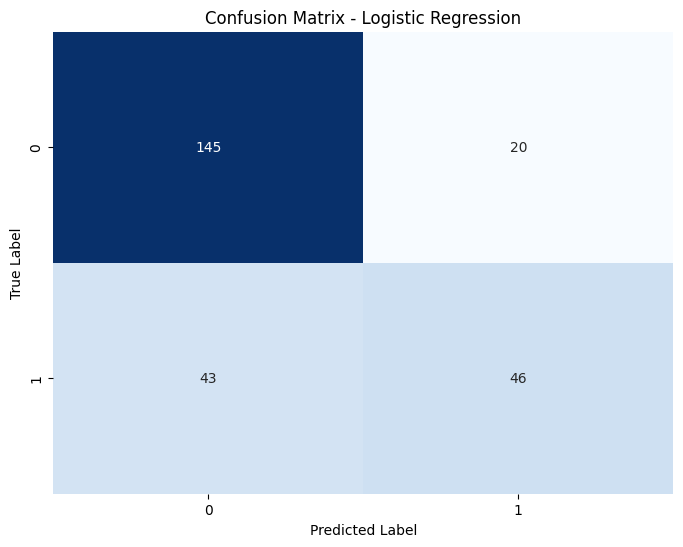

Logistic Regression Evaluation:
Accuracy:  0.7519685039370079
Precision: 0.696969696969697
Recall:    0.5168539325842697
F1 Score:  0.5935483870967742


In [287]:
cm_logreg = confusion_matrix(y_test_d, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

acc_logreg = accuracy(y_test_d.values, y_pred_logreg)
prec_logreg = precision(y_test_d.values, y_pred_logreg)
rec_logreg = recall(y_test_d.values, y_pred_logreg)
f1_logreg = f1_score(y_test_d.values, y_pred_logreg)

print("Logistic Regression Evaluation:")
print(f"Accuracy:  {acc_logreg}")
print(f"Precision: {prec_logreg}")
print(f"Recall:    {rec_logreg}")
print(f"F1 Score:  {f1_logreg}")

#### 2.6 Draw a ROC curve and compute Area Under the Curve (AUC)

You can use [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) and [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).
Check documentation for examples.
For roc_auc_score use predicted probabilities (`predict_proba`), not predicted values. This will align your AUC and ROC curve values.

`predict_proba()` method returns a two-dimensional array. For each instance the predicted class is the class with the maximum probability. So one simple way to get the estimated probabilities for the predicted classes is to use `np.max()`

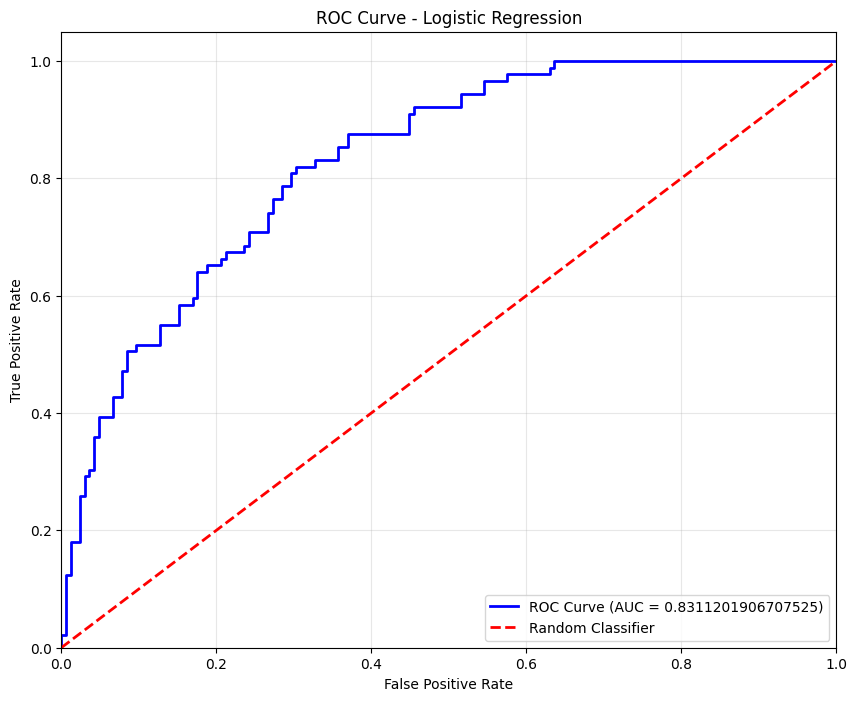

AUC Score for Logistic Regression: 0.8311201906707525


In [288]:

y_proba_logreg_pos = y_proba_logreg[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_d, y_proba_logreg_pos)
auc_logreg = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_logreg})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Score for Logistic Regression: {auc_logreg}")

#### 2.7 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). Feed you scaled X train and y train data.

In [289]:
cv_scores_logreg = cross_val_score(model_logreg, X_train_d_scaled, y_train_d, cv=10, scoring='accuracy')

print("K-Fold for Logistic Regression (k=10):")
print(f"CV Scores: {cv_scores_logreg}")
print(f"Mean CV Score: {cv_scores_logreg.mean()}")
print(f"Std CV Score: {cv_scores_logreg.std()}")
print(f"Min CV Score: {cv_scores_logreg.min()}")
print(f"Max CV Score: {cv_scores_logreg.max()}")

K-Fold for Logistic Regression (k=10):
CV Scores: [0.69230769 0.82692308 0.78846154 0.73076923 0.70588235 0.76470588
 0.88235294 0.7254902  0.7254902  0.80392157]
Mean CV Score: 0.764630467571644
Std CV Score: 0.05722158340888853
Min CV Score: 0.6923076923076923
Max CV Score: 0.8823529411764706


### 3. Use Decision tree classification model to make predictions and evaluate it with above developed functions. Draw ROC curve and compute AUC. Perform k-fold cross-validation.

#### 3.1 Create classification tree object, fit model and generate predictions

In [290]:
model_dt = DecisionTreeClassifier(random_state=17)
model_dt.fit(X_train_d_scaled, y_train_d)

y_pred_dt = model_dt.predict(X_test_d_scaled)
y_proba_dt = model_dt.predict_proba(X_test_d_scaled)

print(f"Tree depth: {model_dt.get_depth()}")
print(f"Number of leaves: {model_dt.get_n_leaves()}")

Tree depth: 14
Number of leaves: 91


#### 3.2 Evaluate created model with above functions

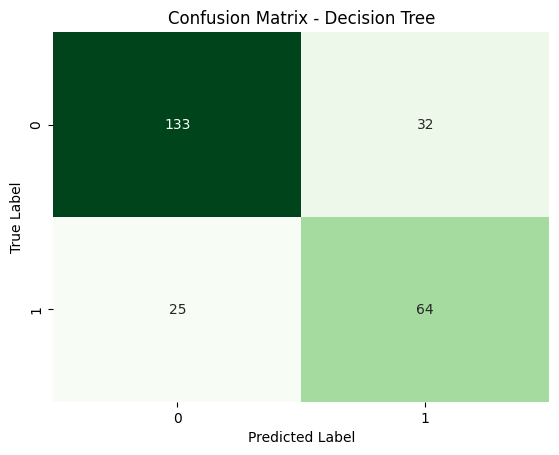

Decision Tree Evaluation Metrics:
Accuracy:  0.7755905511811023
Precision: 0.6666666666666666
Recall:    0.7191011235955056
F1 Score:  0.6918918918918919


In [291]:
cm_dt = confusion_matrix(y_test_d, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

acc_dt = accuracy(y_test_d.values, y_pred_dt)
prec_dt = precision(y_test_d.values, y_pred_dt)
rec_dt = recall(y_test_d.values, y_pred_dt)
f1_dt = f1_score(y_test_d.values, y_pred_dt)

print("Decision Tree Evaluation Metrics:")
print(f"Accuracy:  {acc_dt}")
print(f"Precision: {prec_dt}")
print(f"Recall:    {rec_dt}")
print(f"F1 Score:  {f1_dt}")

#### 3.3 Draw a ROC curve and compute Area Under the Curve (AUC)

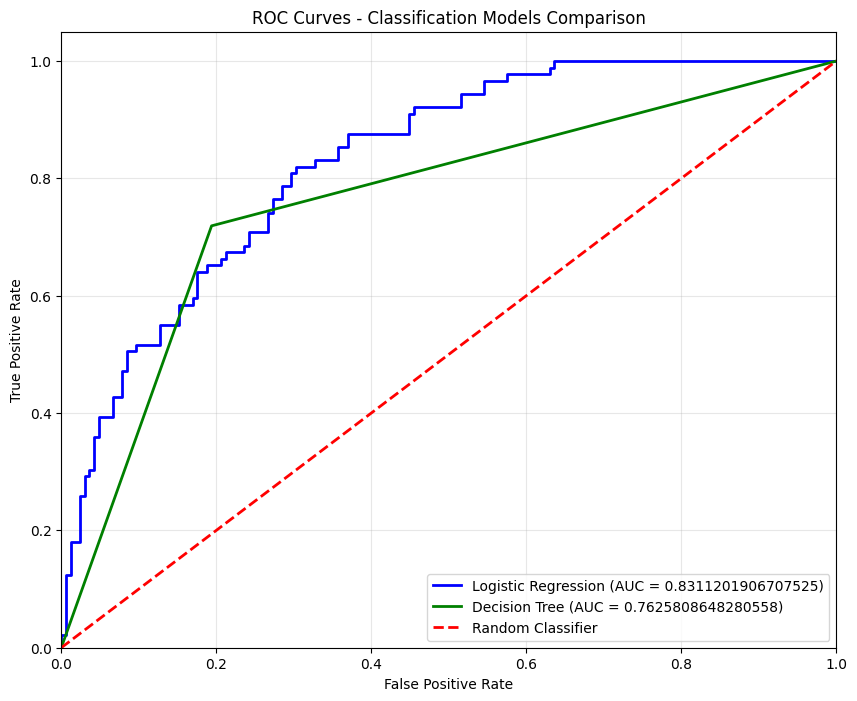

AUC Score for Decision Tree: 0.7625808648280558
AUC Score for Logistic Regression: 0.8311201906707525


In [292]:
y_proba_dt_pos = y_proba_dt[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test_d, y_proba_dt_pos)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_logreg})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_dt})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Classification Models Comparison')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Score for Decision Tree: {auc_dt}")
print(f"AUC Score for Logistic Regression: {auc_logreg}")

#### 3.4 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

In [294]:
cv_scores_dt = cross_val_score(model_dt, X_train_d_scaled, y_train_d, cv=10, scoring='accuracy')

print("K-Fold for Decision Tree (k=10):")
print(f"CV Scores: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean()}")
print(f"Std CV Score: {cv_scores_dt.std()}")
print(f"Min CV Score: {cv_scores_dt.min()}")
print(f"Max CV Score: {cv_scores_dt.max()}")

classification_results = {
    'Model': ['Logistic Regression'],
    'Accuracy': [acc_logreg],
    'Precision': [prec_logreg],
    'Recall': [rec_logreg],
    'F1 Score': [f1_logreg]
}

classification_results['Model'].append('Decision Tree')
classification_results['Accuracy'].append(acc_dt)
classification_results['Precision'].append(prec_dt)
classification_results['Recall'].append(rec_dt)
classification_results['F1 Score'].append(f1_dt)

results_df_class = pd.DataFrame(classification_results)

print()
print("CLASSIFICATION MODELS COMPARISON")

print(results_df_class.to_string(index=False))
print()

print("CROSS-VALIDATION SCORE COMPARISON")

print(f"{'Model':<20} {'Mean CV Score':<15} {'Std':<10}")

print(f"{'Logistic Regression':<20} {cv_scores_logreg.mean():<15.4f} {cv_scores_logreg.std():<10.4f}")
print(f"{'Decision Tree':<20} {cv_scores_dt.mean():<15.4f} {cv_scores_dt.std():<10.4f}")

K-Fold for Decision Tree (k=10):
CV Scores: [0.65384615 0.75       0.75       0.71153846 0.68627451 0.68627451
 0.90196078 0.60784314 0.74509804 0.76470588]
Mean CV Score: 0.7257541478129713
Std CV Score: 0.07517250865828227
Min CV Score: 0.6078431372549019
Max CV Score: 0.9019607843137255

CLASSIFICATION MODELS COMPARISON
              Model  Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.751969   0.696970 0.516854  0.593548
      Decision Tree  0.775591   0.666667 0.719101  0.691892

CROSS-VALIDATION SCORE COMPARISON
Model                Mean CV Score   Std       
Logistic Regression  0.7646          0.0572    
Decision Tree        0.7258          0.0752    


#### 3.5 Make conclusions



- Logistic Regression: Simpler, more interpretable, good for understanding feature impact
- Decision Tree: Captures complex patterns, easy to visualize, but may overfit
- Accuracy: Overall correctness of predictions
- Precision & Recall: Balance detection rate vs false alarms
- F1 Score: Harmonic mean of precision and recall
- AUC: Model's ability to distinguish between classes
- Best for medical data: Prioritize recall to minimize missed diagnoses